# Project 4: Regression Analysis and Define Your Own Task!
### Serena Tang, Liwen Yang, Winston Wang

Data set chosen: Diamond Characteristics

### Question 1.1
- ***Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report which features have the highest absolute correlation with the target variable. In the context of either dataset, describe what the correlation patterns suggest.***
    - For the diamond dataset, the price is the target variable. From the matrix plot, it appears that the diamond carat and x, y, and z dimensions have the highest absolute correlation with the price. This implies that the actual price of the diamond mainly rely on these factors; while factors like color and depth may play a role in the diamond price, they are not the main determining factors. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import diamond data
diamonds_df = pd.read_csv('diamonds.csv')

# convert categorical data into numerial data
diamonds_df['cut_int'] = pd.Categorical(diamonds_df['cut']).codes
diamonds_df['color_int'] = pd.Categorical(diamonds_df['color']).codes
diamonds_df['clarity_int'] = pd.Categorical(diamonds_df['clarity']).codes

Text(0.5, 1.0, 'Pearson Correlation Matrix')

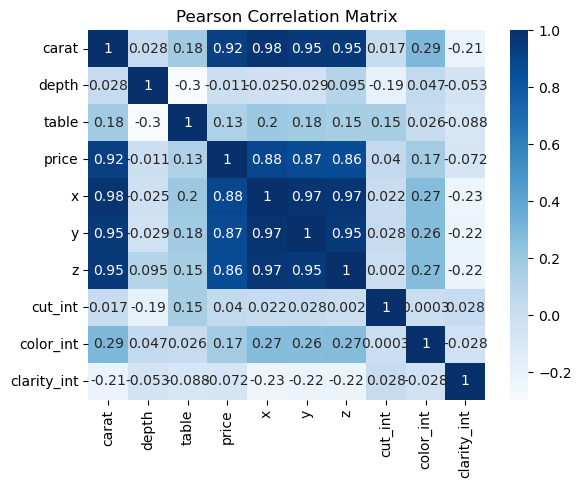

In [2]:
sns.heatmap(diamonds_df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_int','color_int', 'clarity_int']].corr(), annot = True, cmap=plt.cm.Blues)
plt.title('Pearson Correlation Matrix')

### Question 1.2
- ***Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness?***
    - The histogram of all the numerical features are shown below; from the plots, most of the data is very right skewed. The data can have a log transformation or a square root transformation on the data by apply the function to the data. Additionally, the data can be normalised to be zero mean with a standard deviation of 1. 

Text(0.5, 1.0, 'Diamond Z Frequency')

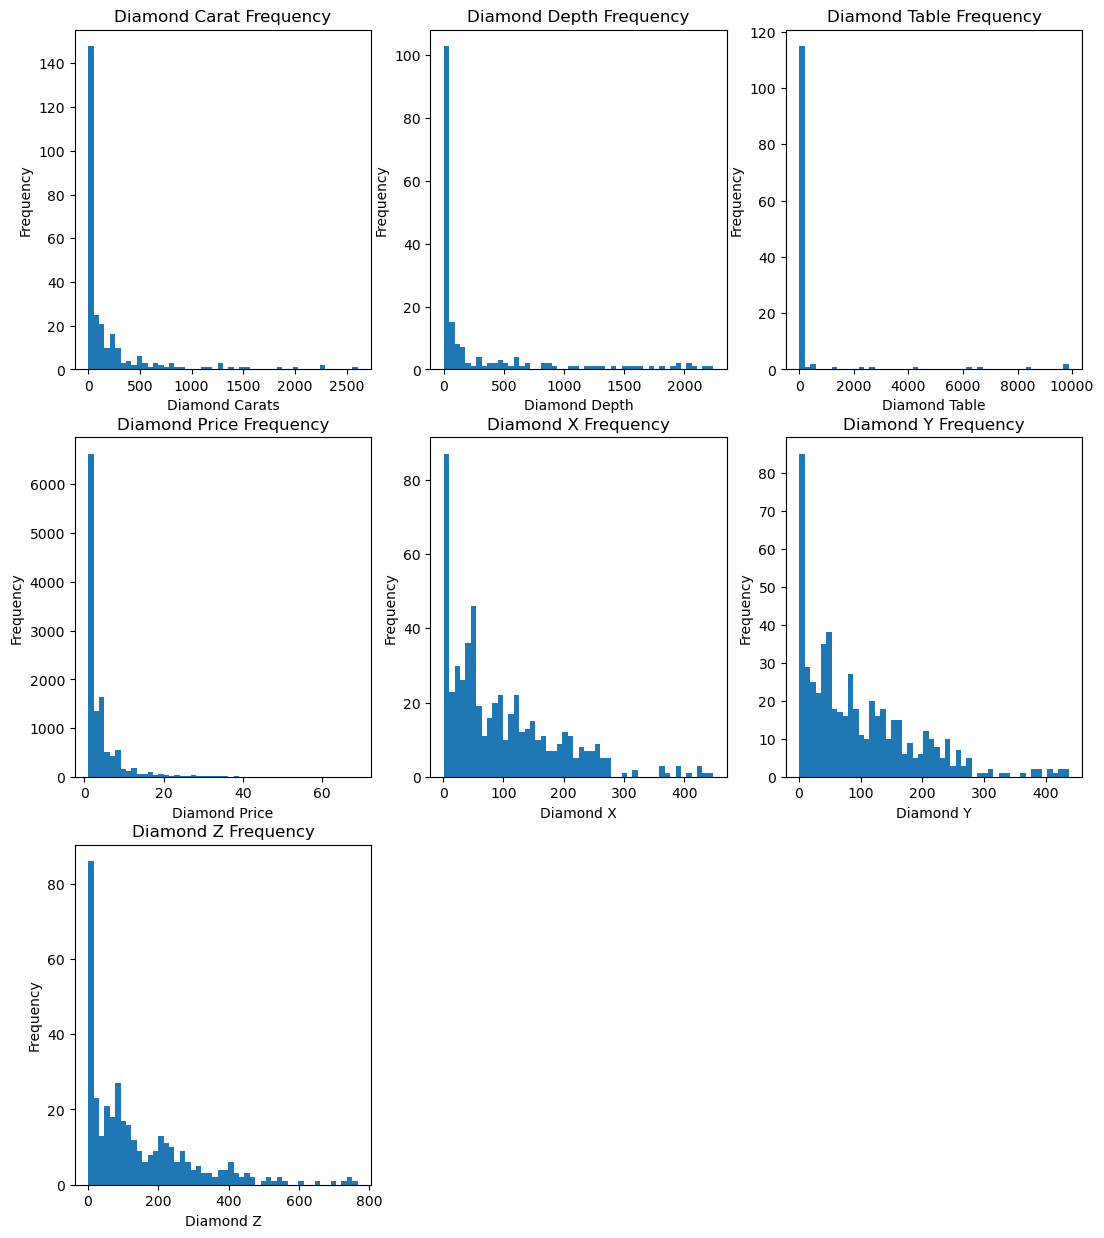

In [3]:
plt.figure(figsize=(13, 15))
plt.subplot(3, 3, 1)
diamonds_df.carat.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Carats')
plt.title('Diamond Carat Frequency')

plt.subplot(3, 3, 2)
diamonds_df.depth.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Depth')
plt.title('Diamond Depth Frequency')

plt.subplot(3, 3, 3)
diamonds_df.table.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Table')
plt.title('Diamond Table Frequency')

plt.subplot(3, 3, 4)
diamonds_df.price.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Price')
plt.title('Diamond Price Frequency')

plt.subplot(3, 3, 5)
diamonds_df.x.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond X')
plt.title('Diamond X Frequency')

plt.subplot(3, 3, 6)
diamonds_df.y.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Y')
plt.title('Diamond Y Frequency')

plt.subplot(3, 3, 7)
diamonds_df.z.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Z')
plt.title('Diamond Z Frequency')

### Question 1.3
- ***Construct and inspect the box plot of categorical features vs target variable. What do you find?***
    - The box plots of all the categorical features are shown below. It appears that most of the data contains a lot of outliers and is thus skewed towards the higher prices. 

Text(0.5, 1.0, 'Box plot of Diamond Clarity')

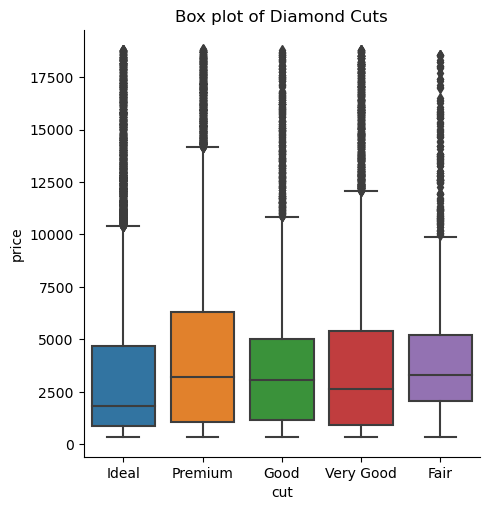

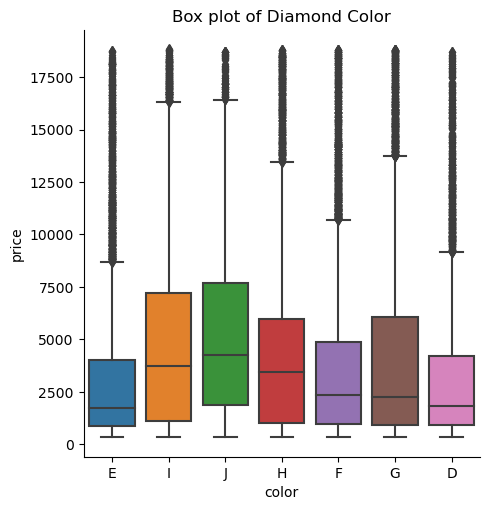

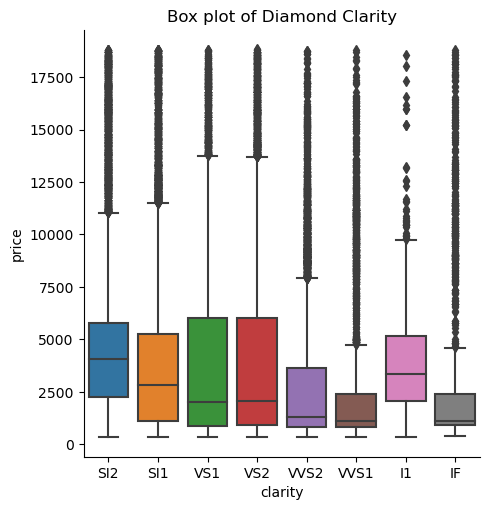

In [4]:
sns.catplot(data=diamonds_df, x="cut", y="price", kind="box")
plt.title('Box plot of Diamond Cuts')


sns.catplot(data=diamonds_df, x="color", y="price", kind="box")
plt.title('Box plot of Diamond Color')


sns.catplot(data=diamonds_df, x="clarity", y="price", kind="box")
plt.title('Box plot of Diamond Clarity')

### Question 1.4
- ***For the Diamonds dataset, plot the counts by color, cut and clarity***
    - The 3 count plots are shown below.

Text(0, 0.5, 'Frequency')

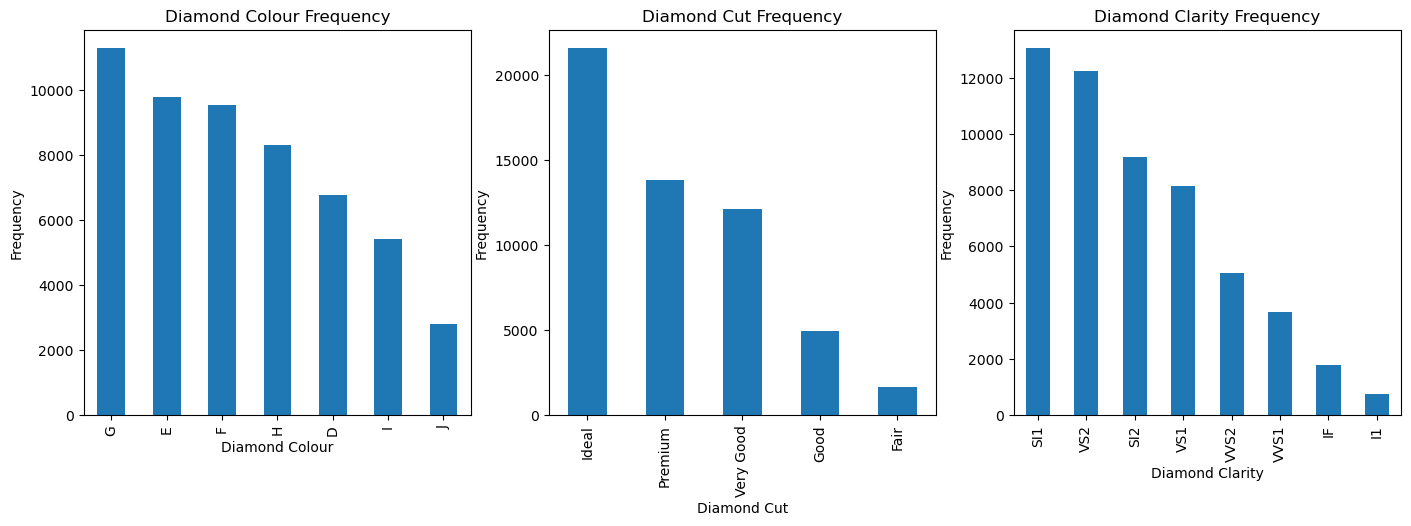

In [5]:
plt.figure(figsize=(17, 5))
plt.subplot(1,3,1)
diamonds_df.color.value_counts().plot(kind='bar')
plt.xlabel('Diamond Colour')
plt.title('Diamond Colour Frequency')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
diamonds_df.cut.value_counts().plot(kind='bar')
plt.xlabel('Diamond Cut')
plt.title('Diamond Cut Frequency')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
diamonds_df.clarity.value_counts().plot(kind='bar')
plt.xlabel('Diamond Clarity')
plt.title('Diamond Clarity Frequency')
plt.ylabel('Frequency')

### Question 2.1
- ***Standardize feature columns and prepare them for training.***

### Question 2.2
- ***Describe how this step qualitatively affects the performance of your models in terms of test RMSE. Is it true for all model types? Also list two features for either dataset that has the lowest MI w.r.t to the target.***

### Question 3
- ***For random forest model, measure “Out-of-Bag Error” (OOB) as well. Explain what OOB error and R2 score means given this link.***

### Question 4.1
- ***Explain how each regularization scheme affects the learned parameter set.***

### Question 4.2
- ***Report your choice of the best regularization scheme along with the optimal penalty parameter and explain how you computed it.***

### Question 4.3
- ***Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Justify your answer.***

### Question 4.4
- ***Some linear regression packages return p-values for different features2. What is the meaning of these p-values and how can you infer the most significant features?***


Perform polynomial regression by crafting products of features you selected in part 3.1.4 up to a certain degree (max degree 6) and applying ridge regression on the compound
features. You can use scikit-learn library to build such features. Avoid overfitting by proper regularization. Answer the following:

### Question 5.1
- ***What are the most salient features? Why?***

### Question 5.2
- ***What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data?***

You will train a multi-layer perceptron (fully connected neural network). You can simply use the sklearn implementation:

### Question 6.1
- ***Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total).***

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

### X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

mlp = MLPClassifier(random_state=0, activation= 'relu', solver = 'adam', hidden_layer_sizes=(40,))

### mlp.fit(X_train, y_train)

### mlp.score(X_test, y_test)

### Question 6.2
- ***How does the performance generally compare with linear regression? Why?***

### Question 6.3
- ***What activation function did you use for the output and why? You may use none.***

### Question 6.4
- ***What is the risk of increasing the depth of the network too far?***
    - Increasing the network depth can cause overfitting as the deeper the network is, the more the weights are able to be tuned to learn the data; however, this can cause a high training accuracy as the model can learn noise present in the data. This can cause there to be a low testing accuracy.